In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from collections import Counter

/Users/shawlu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shawlu/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Load Datasets

In [2]:
df_trn = pd.read_csv("data/df_trn.csv")
df_trn.fillna(0, inplace=True)

df_dev = pd.read_csv("data/df_trn.csv")
df_dev.fillna(0, inplace=True)

In [3]:
df_trn.head()

,session,visitor,dt,custno,category,event1,event2
0,1067102,330917,2017-04-30 06:37:47,55702,2,0.0,7
1,786797,33718,2016-11-30 19:20:09,64481,3,0.0,3
2,1895397,211419,2017-04-26 14:25:34,37791,3,7.0,7
3,3268795,430895,2017-10-08 17:26:09,68143,3,0.0,9
4,3109130,185443,2017-10-21 15:37:02,3751,3,11.0,7


#### Train Baseline

In [4]:
X_trn = df_trn[["custno", "visitor", "event1", "category"]]

In [5]:
Y_trn = df_trn.event2

In [6]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_trn, Y_trn)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### Evaluate Baseline

Text(0,0.5,'Feature Importance Score')

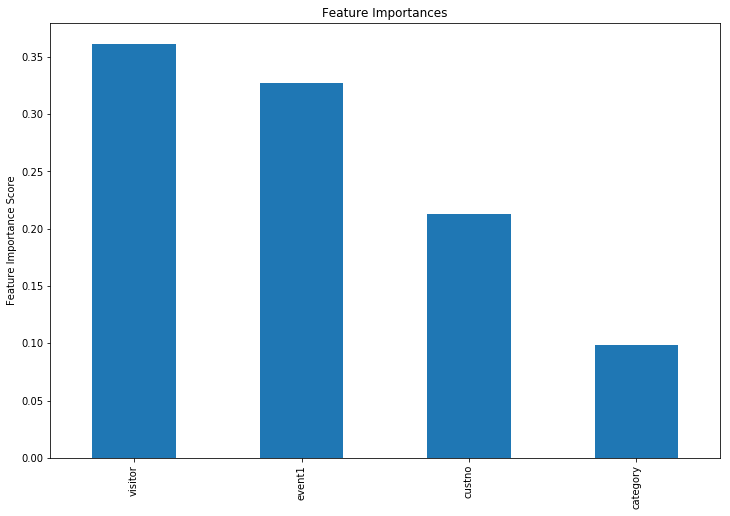

In [8]:
plt.figure(figsize=(12, 8))
feat_imp = pd.Series(gbm.feature_importances_, X_trn.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [9]:
X_dev = df_dev[["custno", "visitor", "event1", "category"]]
Y_dev = df_dev.event2

Y_pred = gbm.predict(X_dev)
Y_prob = gbm.predict_proba(X_dev)[:,1]

##### Prediction Distribution

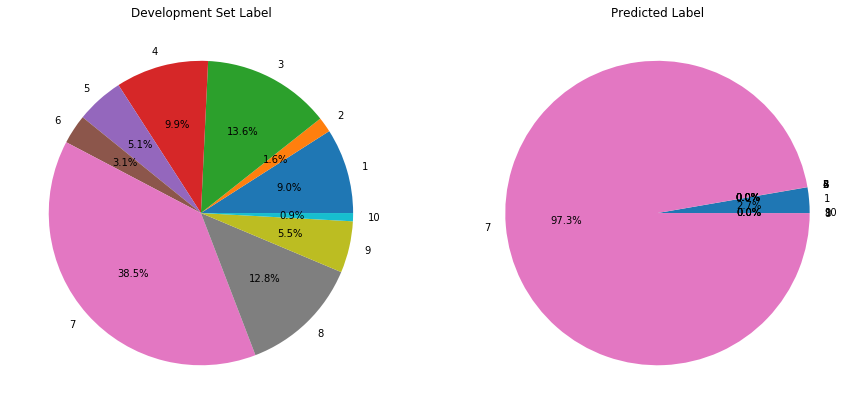

In [10]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

value_counts = Counter(Y_dev)
_ = ax1.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%', 
            labeldistance = 1.1)
ax1.set_title('Development Set Label')

ax2 = plt.subplot(1, 2, 2)

value_counts = Counter(Y_pred)
_ = ax2.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%',
            labeldistance = 1.1)

ax2.set_title('Predicted Label')

plt.show()

##### Confuson Matrix

In [11]:
df_m = pd.DataFrame(confusion_matrix(Y_dev, Y_pred), columns=["predicted_%i"%(i + 1) for i in range(10)])

In [12]:
df_m.index = df_m.index.map(lambda x : "true_" + str(x + 1))

In [13]:
df_m

,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,predicted_9,predicted_10
true_0,12104,2,0,0,6,4,65594,0,0,0
true_1,2654,18,0,0,0,0,11169,0,0,0
true_2,0,0,17,0,0,8,116766,0,0,0
true_3,9,0,2,10,0,1,84781,0,0,0
true_4,691,0,0,0,24,3,42716,0,0,0
true_5,31,0,0,0,0,49,26813,0,0,0
true_6,7815,4,4,1,1,6,323273,1,0,6
true_7,0,0,0,0,0,4,110206,8,0,1
true_8,0,1,0,0,0,2,47032,0,7,0
true_9,0,0,0,0,0,0,7432,0,0,20


In [14]:
np.sum(df_m, axis=1) / len(df_dev)

true_0    0.090434
true_1    0.016107
true_2    0.135915
true_3    0.098689
true_4    0.050546
true_5    0.031297
true_6    0.385328
true_7    0.128267
true_8    0.054745
true_9    0.008672
dtype: float64

In [15]:
np.sum(df_m, axis=0) / len(df_dev)

predicted_1     0.027120
predicted_2     0.000029
predicted_3     0.000027
predicted_4     0.000013
predicted_5     0.000036
predicted_6     0.000090
predicted_7     0.972636
predicted_8     0.000010
predicted_9     0.000008
predicted_10    0.000031
dtype: float64

In [16]:
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.3905
